In [1]:
# importing the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
# Reading the input
data = pd.read_csv('/content/gdrive/MyDrive/Sample-data/pubg.csv')
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


### EDA

In [4]:
data.shape

(4446966, 29)

In [5]:
data.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [6]:
data.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [7]:
# checking for duplicates
data[data.duplicated()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc


In [8]:
# Dropping the null Values
data.dropna(inplace=True)

In [9]:
data.shape

(4446965, 29)

In [10]:
# Correlation
data.corr()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
assists,1.000000,0.307683,0.406726,0.301057,0.198289,0.228556,-0.290062,0.039066,0.319690,0.243471,0.261425,-0.019450,-0.147916,-0.146805,-0.016407,0.198320,0.110644,0.011903,0.023372,0.006081,0.057921,0.290305,0.243882,0.024014,0.299441
boosts,0.307683,1.000000,0.521947,0.358907,0.334661,0.535854,-0.554844,0.008347,0.502024,0.405327,0.423290,0.072107,-0.013686,-0.012929,0.023202,0.253125,0.328855,0.035124,0.107993,0.013068,0.087387,0.640150,0.406609,-0.007645,0.634234
damageDealt,0.406726,0.521947,1.000000,0.735763,0.613409,0.342987,-0.677398,0.049904,0.888783,0.703599,0.563837,-0.006756,-0.040708,-0.040079,-0.001459,0.256951,0.140883,0.052487,0.036729,0.015468,0.081182,0.398199,0.353248,0.017762,0.440507
DBNOs,0.301057,0.358907,0.735763,1.000000,0.469923,0.265485,-0.555290,0.042616,0.707848,0.646872,0.451422,-0.014486,-0.267710,-0.265789,-0.003451,0.300999,0.102537,0.036093,0.017320,0.069430,0.060210,0.284660,0.218161,0.011108,0.279970
headshotKills,0.198289,0.334661,0.613409,0.469923,1.000000,0.199917,-0.469829,0.023988,0.674275,0.512882,0.447261,-0.017657,0.009211,0.009389,0.005119,0.150145,0.076495,0.013369,0.028531,0.008658,0.039200,0.250982,0.217552,0.004982,0.277722
heals,0.228556,0.535854,0.342987,0.265485,0.199917,1.000000,-0.386032,-0.002585,0.311781,0.270412,0.263278,0.108901,-0.064759,-0.064204,0.019142,0.236680,0.297484,0.024619,0.079587,0.035386,0.062870,0.430266,0.309071,-0.010990,0.427857
killPlace,-0.290062,-0.554844,-0.677398,-0.555290,-0.469829,-0.386032,1.000000,-0.023278,-0.730499,-0.810517,-0.541146,-0.005806,0.016791,0.018786,-0.014805,-0.269804,-0.236202,-0.057356,-0.089396,-0.037797,-0.073569,-0.590236,-0.490144,-0.002415,-0.719069
killPoints,0.039066,0.008347,0.049904,0.042616,0.023988,-0.002585,-0.023278,1.000000,0.036192,0.037091,0.014084,-0.099542,-0.044802,-0.042367,-0.975555,0.012041,-0.029316,-0.004156,-0.004604,-0.039739,-0.009658,0.004630,-0.003978,0.983417,0.012908
kills,0.319690,0.502024,0.888783,0.707848,0.674275,0.311781,-0.730499,0.036192,1.000000,0.802500,0.602936,-0.030688,-0.004847,-0.004060,0.008200,0.253323,0.114750,0.063651,0.039127,0.017601,0.079991,0.374774,0.336414,0.006929,0.419916
killStreaks,0.243471,0.405327,0.703599,0.646872,0.512882,0.270412,-0.810517,0.037091,0.802500,1.000000,0.515097,-0.034645,-0.037339,-0.036054,0.003426,0.241695,0.098420,0.065575,0.034588,0.027612,0.064374,0.327639,0.275373,0.008552,0.377566


In [11]:
# Correlation with the Win Place Predection
data.corrwith(data.winPlacePerc)

assists            0.299441
boosts             0.634234
damageDealt        0.440507
DBNOs              0.279970
headshotKills      0.277722
heals              0.427857
killPlace         -0.719069
killPoints         0.012908
kills              0.419916
killStreaks        0.377566
longestKill        0.410154
matchDuration     -0.005171
maxPlace           0.037377
numGroups          0.039621
rankPoints         0.013523
revives            0.240881
rideDistance       0.342915
roadKills          0.034544
swimDistance       0.149607
teamKills          0.015943
vehicleDestroys    0.073436
walkDistance       0.810888
weaponsAcquired    0.583806
winPoints          0.007061
winPlacePerc       1.000000
dtype: float64

In [12]:
#data.matchType
for j in ['matchType']:
    print(f'unique[{j}] count:',data[j].describe())

unique[matchType] count: count       4446965
unique           16
top       squad-fpp
freq        1756186
Name: matchType, dtype: object


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4446965 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [14]:
data.describe().drop('count').T

,mean,std,min,25%,50%,75%,max
assists,0.233815,0.588573,0.0,0.0,0.0000,0.0000,22.0
boosts,1.106908,1.715794,0.0,0.0,0.0000,2.0000,33.0
damageDealt,130.717167,170.780629,0.0,0.0,84.2400,186.0000,6616.0
DBNOs,0.657876,1.145743,0.0,0.0,0.0000,1.0000,53.0
headshotKills,0.226820,0.602155,0.0,0.0,0.0000,0.0000,64.0
heals,1.370148,2.679982,0.0,0.0,0.0000,2.0000,80.0
killPlace,47.599361,27.462931,1.0,24.0,47.0000,71.0000,101.0
killPoints,505.006156,627.504921,0.0,0.0,0.0000,1172.0000,2170.0
kills,0.924784,1.558445,0.0,0.0,0.0000,1.0000,72.0
killStreaks,0.543955,0.710972,0.0,0.0,0.0000,1.0000,20.0


In [15]:
# To view the unique count of ID's
for m in ['Id', 'groupId', 'matchId']:
    print(f'unique[{m}] count: ',data[m].nunique())

unique[Id] count:  4446965
unique[groupId] count:  2026744
unique[matchId] count:  47964


# Grouping by Types of Game modes Available

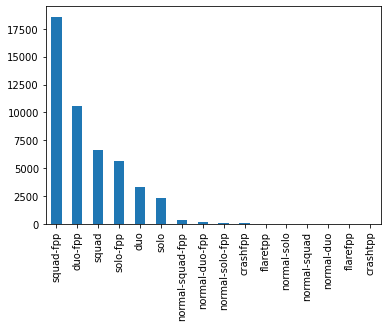

In [16]:
data.groupby('matchId')['matchType'].first().value_counts().plot.bar()

#### Three cateories classified as follows
- solo  <-- solo,solo-fpp,normal-solo,normal-solo-fpp
- duo   <-- duo,duo-fpp,normal-duo,normal-duo-fpp,crashfpp,crashtpp
- squad <-- squad,squad-fpp,normal-squad,normal-squad-fpp,flarefpp,flaretpp

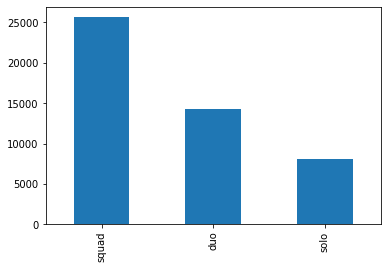

In [17]:
m = lambda x: 'solo' if ('solo' in x) else 'duo' if ('duo' in x) or ('crash' in x) else 'squad'
data['matchType'] = data['matchType'].apply(m)
data.groupby('matchId')['matchType'].first().value_counts().plot.bar()

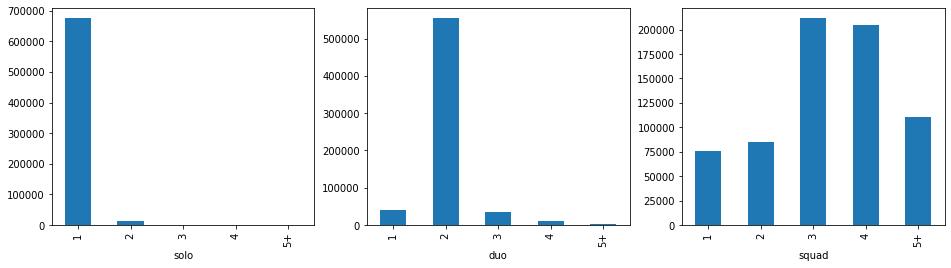

In [19]:
group = data.groupby(['matchId','groupId','matchType'])['Id'].count().to_frame('players').reset_index()
group.loc[group['players'] > 4, 'players'] = '5+'
group['players'] = group['players'].astype(str)

fig, ax = plt.subplots(1, 3, figsize=(16, 4))
for mt, ax in zip(['solo','duo','squad'], ax.ravel()):
    ax.set_xlabel(mt)
    group[group['matchType'] == mt]['players'].value_counts().sort_index().plot.bar(ax=ax)

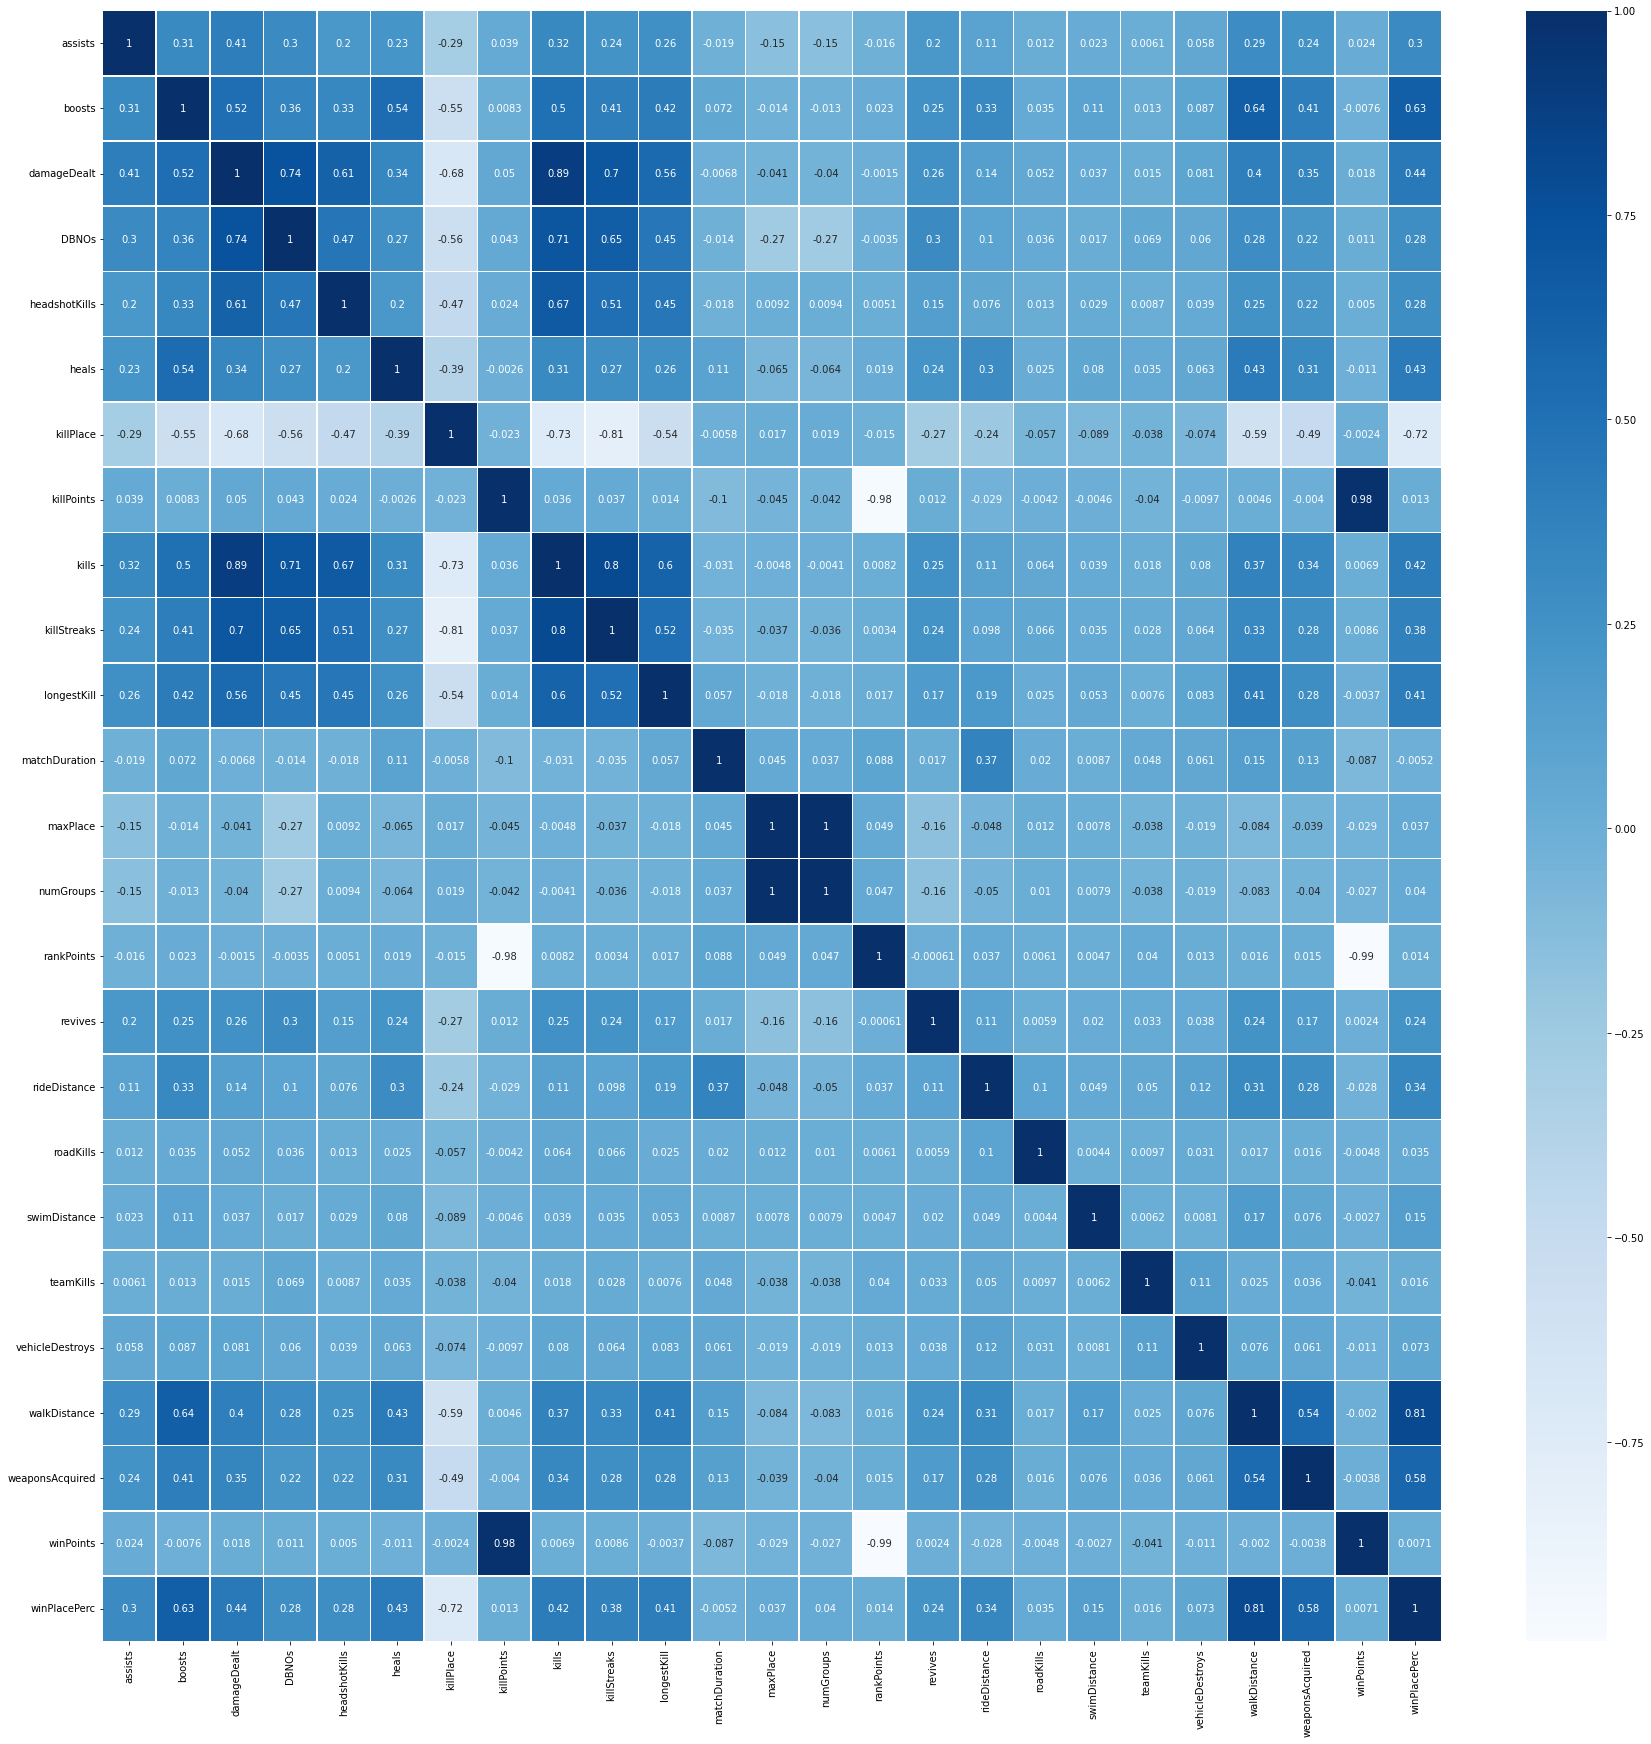

In [20]:
# Corellation of features
plt.figure(figsize=(30,30))
sb.heatmap(data.corr(),annot=True,cmap='Blues',linewidths=.6)

In [21]:
# Create correlation matrix
corr_matrix = data.corr().abs()
corr_matrix

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
assists,1.000000,0.307683,0.406726,0.301057,0.198289,0.228556,0.290062,0.039066,0.319690,0.243471,0.261425,0.019450,0.147916,0.146805,0.016407,0.198320,0.110644,0.011903,0.023372,0.006081,0.057921,0.290305,0.243882,0.024014,0.299441
boosts,0.307683,1.000000,0.521947,0.358907,0.334661,0.535854,0.554844,0.008347,0.502024,0.405327,0.423290,0.072107,0.013686,0.012929,0.023202,0.253125,0.328855,0.035124,0.107993,0.013068,0.087387,0.640150,0.406609,0.007645,0.634234
damageDealt,0.406726,0.521947,1.000000,0.735763,0.613409,0.342987,0.677398,0.049904,0.888783,0.703599,0.563837,0.006756,0.040708,0.040079,0.001459,0.256951,0.140883,0.052487,0.036729,0.015468,0.081182,0.398199,0.353248,0.017762,0.440507
DBNOs,0.301057,0.358907,0.735763,1.000000,0.469923,0.265485,0.555290,0.042616,0.707848,0.646872,0.451422,0.014486,0.267710,0.265789,0.003451,0.300999,0.102537,0.036093,0.017320,0.069430,0.060210,0.284660,0.218161,0.011108,0.279970
headshotKills,0.198289,0.334661,0.613409,0.469923,1.000000,0.199917,0.469829,0.023988,0.674275,0.512882,0.447261,0.017657,0.009211,0.009389,0.005119,0.150145,0.076495,0.013369,0.028531,0.008658,0.039200,0.250982,0.217552,0.004982,0.277722
heals,0.228556,0.535854,0.342987,0.265485,0.199917,1.000000,0.386032,0.002585,0.311781,0.270412,0.263278,0.108901,0.064759,0.064204,0.019142,0.236680,0.297484,0.024619,0.079587,0.035386,0.062870,0.430266,0.309071,0.010990,0.427857
killPlace,0.290062,0.554844,0.677398,0.555290,0.469829,0.386032,1.000000,0.023278,0.730499,0.810517,0.541146,0.005806,0.016791,0.018786,0.014805,0.269804,0.236202,0.057356,0.089396,0.037797,0.073569,0.590236,0.490144,0.002415,0.719069
killPoints,0.039066,0.008347,0.049904,0.042616,0.023988,0.002585,0.023278,1.000000,0.036192,0.037091,0.014084,0.099542,0.044802,0.042367,0.975555,0.012041,0.029316,0.004156,0.004604,0.039739,0.009658,0.004630,0.003978,0.983417,0.012908
kills,0.319690,0.502024,0.888783,0.707848,0.674275,0.311781,0.730499,0.036192,1.000000,0.802500,0.602936,0.030688,0.004847,0.004060,0.008200,0.253323,0.114750,0.063651,0.039127,0.017601,0.079991,0.374774,0.336414,0.006929,0.419916
killStreaks,0.243471,0.405327,0.703599,0.646872,0.512882,0.270412,0.810517,0.037091,0.802500,1.000000,0.515097,0.034645,0.037339,0.036054,0.003426,0.241695,0.098420,0.065575,0.034588,0.027612,0.064374,0.327639,0.275373,0.008552,0.377566


In [22]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
assists,NaN,0.307683,0.406726,0.301057,0.198289,0.228556,0.290062,0.039066,0.319690,0.243471,0.261425,0.019450,0.147916,0.146805,0.016407,0.198320,0.110644,0.011903,0.023372,0.006081,0.057921,0.290305,0.243882,0.024014,0.299441
boosts,NaN,NaN,0.521947,0.358907,0.334661,0.535854,0.554844,0.008347,0.502024,0.405327,0.423290,0.072107,0.013686,0.012929,0.023202,0.253125,0.328855,0.035124,0.107993,0.013068,0.087387,0.640150,0.406609,0.007645,0.634234
damageDealt,NaN,NaN,NaN,0.735763,0.613409,0.342987,0.677398,0.049904,0.888783,0.703599,0.563837,0.006756,0.040708,0.040079,0.001459,0.256951,0.140883,0.052487,0.036729,0.015468,0.081182,0.398199,0.353248,0.017762,0.440507
DBNOs,NaN,NaN,NaN,NaN,0.469923,0.265485,0.555290,0.042616,0.707848,0.646872,0.451422,0.014486,0.267710,0.265789,0.003451,0.300999,0.102537,0.036093,0.017320,0.069430,0.060210,0.284660,0.218161,0.011108,0.279970
headshotKills,NaN,NaN,NaN,NaN,NaN,0.199917,0.469829,0.023988,0.674275,0.512882,0.447261,0.017657,0.009211,0.009389,0.005119,0.150145,0.076495,0.013369,0.028531,0.008658,0.039200,0.250982,0.217552,0.004982,0.277722
heals,NaN,NaN,NaN,NaN,NaN,NaN,0.386032,0.002585,0.311781,0.270412,0.263278,0.108901,0.064759,0.064204,0.019142,0.236680,0.297484,0.024619,0.079587,0.035386,0.062870,0.430266,0.309071,0.010990,0.427857
killPlace,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.023278,0.730499,0.810517,0.541146,0.005806,0.016791,0.018786,0.014805,0.269804,0.236202,0.057356,0.089396,0.037797,0.073569,0.590236,0.490144,0.002415,0.719069
killPoints,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.036192,0.037091,0.014084,0.099542,0.044802,0.042367,0.975555,0.012041,0.029316,0.004156,0.004604,0.039739,0.009658,0.004630,0.003978,0.983417,0.012908
kills,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.802500,0.602936,0.030688,0.004847,0.004060,0.008200,0.253323,0.114750,0.063651,0.039127,0.017601,0.079991,0.374774,0.336414,0.006929,0.419916
killStreaks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.515097,0.034645,0.037339,0.036054,0.003426,0.241695,0.098420,0.065575,0.034588,0.027612,0.064374,0.327639,0.275373,0.008552,0.377566


In [23]:
# Find features with correlation greater than 0.50
higher_corr = [column for column in upper.columns if any(upper[column] > 0.75)]
higher_corr

['kills',
 'killStreaks',
 'numGroups',
 'rankPoints',
 'winPoints',
 'winPlacePerc']

# Extracting Solo,Duo and Squad data seperately

In [24]:
df = data[data['matchType']=='solo']
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000,0,0,0,45,0,1,1,58.53,1424,solo,97,95,1560,0,0.0,0,0.00,0,0,49.75,2,0,0.1875
7,311b84c6ff4390,eaba5fcb7fc1ae,292611730ca862,0,0,8.538,0,0,0,48,1000,0,0,0.00,1967,solo,96,92,-1,0,2004.0,0,0.00,0,0,1089.00,6,1500,0.7368
13,b7807186e3f679,3c08e461874749,2c30ddf481c52d,0,1,324.200,0,1,5,5,986,4,1,49.83,1886,solo,97,94,-1,0,1228.0,0,76.84,0,0,2050.00,6,1462,0.8750
17,92022479b92ce7,2f2c33f548c4b9,07948d723b9c0f,0,3,254.300,0,0,12,13,0,2,1,36.00,1371,solo,96,95,1536,0,2367.0,0,15.29,0,0,1787.00,3,0,0.8211
35,47143f942503e0,e17a8867a393ec,bc2faecb77e5ec,0,0,136.900,0,0,0,37,0,1,1,22.83,1425,solo,96,94,1500,0,0.0,0,0.00,0,0,270.70,1,0,0.3474


In [25]:
df.shape

(720712, 29)

In [26]:
df1 = data[data['matchType']=='solo-fpp']
print(df1.shape)
df1.head()


(0, 29)


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc


In [27]:
df2 = data[data['matchType']=='normal-solo-fpp']
print(df2.shape)
df2.head()

(0, 29)


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc


In [28]:
df3 = data[data['matchType']=='normal-solo']
print(df3.shape)
df3.head()

(0, 29)


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc


In [29]:
solo = pd.concat([df,df1,df2,df3],axis=0)
print(solo.shape)
solo.head()

(720712, 29)


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000,0,0,0,45,0,1,1,58.53,1424,solo,97,95,1560,0,0.0,0,0.00,0,0,49.75,2,0,0.1875
7,311b84c6ff4390,eaba5fcb7fc1ae,292611730ca862,0,0,8.538,0,0,0,48,1000,0,0,0.00,1967,solo,96,92,-1,0,2004.0,0,0.00,0,0,1089.00,6,1500,0.7368
13,b7807186e3f679,3c08e461874749,2c30ddf481c52d,0,1,324.200,0,1,5,5,986,4,1,49.83,1886,solo,97,94,-1,0,1228.0,0,76.84,0,0,2050.00,6,1462,0.8750
17,92022479b92ce7,2f2c33f548c4b9,07948d723b9c0f,0,3,254.300,0,0,12,13,0,2,1,36.00,1371,solo,96,95,1536,0,2367.0,0,15.29,0,0,1787.00,3,0,0.8211
35,47143f942503e0,e17a8867a393ec,bc2faecb77e5ec,0,0,136.900,0,0,0,37,0,1,1,22.83,1425,solo,96,94,1500,0,0.0,0,0.00,0,0,270.70,1,0,0.3474


In [30]:
for m in ['Id', 'groupId', 'matchId']:
    print(f'unique[{m}] count: ',solo[m].nunique())

unique[Id] count:  720712
unique[groupId] count:  693493
unique[matchId] count:  8094


In [31]:
solo.corrwith(solo.winPlacePerc)

assists            0.120039
boosts             0.637369
damageDealt        0.481302
DBNOs                   NaN
headshotKills      0.337827
heals              0.401358
killPlace         -0.757971
killPoints         0.023767
kills              0.475520
killStreaks        0.447713
longestKill        0.438195
matchDuration     -0.010163
maxPlace           0.093724
numGroups          0.100875
rankPoints         0.003315
revives                 NaN
rideDistance       0.318398
roadKills          0.050082
swimDistance       0.165086
teamKills          0.024449
vehicleDestroys    0.060818
walkDistance       0.810892
weaponsAcquired    0.596826
winPoints          0.019797
winPlacePerc       1.000000
dtype: float64

In [32]:
d1 = data[data['matchType']=='duo']
print('duo : ',d1.shape)
d2 = data[data['matchType']=='duo-fpp']
print('duo-fpp : ',d2.shape)
d3 = data[data['matchType']=='normal-duo']
print('normal-duo : ',d3.shape)
d4 = data[data['matchType']=='normal-duo-fpp']
print('normal-duo-fpp : ',d4.shape)
d5 = data[data['matchType']=='crashfpp']
print('crashfpp : ',d5.shape)
d6 = data[data['matchType']=='crashtpp']
print('crashtpp : ',d6.shape)
duo = pd.concat([d1,d2,d3,d4,d5,d6],axis=0)
print('total duo : ',duo.shape)
duo.head()

duo :  (1322628, 29)
duo-fpp :  (0, 29)
normal-duo :  (0, 29)
normal-duo-fpp :  (0, 29)
crashfpp :  (0, 29)
crashtpp :  (0, 29)
total duo :  (1322628, 29)


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.000,1318,duo,50,47,1491,0,0.0,0,0.0,0,0,161.8,2,0,0.7755
11,8de328a74658a9,f643df9df3877c,80170383d90003,0,0,137.90,1,0,0,64,0,0,0,0.000,1384,duo,48,46,1488,0,0.0,0,0.0,0,0,451.7,1,0,0.4043
15,12d8d4bd94312c,fe52d481bae68b,6fd9e765ddd0c5,0,0,80.71,1,0,0,72,0,0,0,0.000,1313,duo,48,48,1495,1,0.0,0,0.0,0,0,105.1,5,0,0.2766
20,02ace8c6e58461,a4bc548028f800,80f2b8448e474b,0,4,269.10,0,1,8,18,0,2,1,7.438,1890,duo,48,48,1491,1,2734.0,0,0.0,0,0,1794.0,5,0,0.6383
22,9b2961d4d51f91,799d0a4d61dc3c,e833ca2282169d,0,1,192.30,1,2,3,15,1022,2,1,280.600,1775,duo,49,48,-1,0,2332.0,0,0.0,0,0,1264.0,4,1494,0.7500


In [33]:
duo.corrwith(duo.winPlacePerc)

assists            0.320169
boosts             0.647790
damageDealt        0.471523
DBNOs              0.356358
headshotKills      0.297502
heals              0.446659
killPlace         -0.744370
killPoints         0.014359
kills              0.446807
killStreaks        0.405922
longestKill        0.423718
matchDuration     -0.000067
maxPlace          -0.002485
numGroups          0.010301
rankPoints         0.007348
revives            0.263870
rideDistance       0.368065
roadKills          0.038772
swimDistance       0.152956
teamKills          0.025659
vehicleDestroys    0.073709
walkDistance       0.827704
weaponsAcquired    0.631161
winPoints          0.008943
winPlacePerc       1.000000
dtype: float64

In [34]:
for m in ['Id', 'groupId', 'matchId']:
    print(f'unique[{m}] count: ',duo[m].nunique())

unique[Id] count:  1322628
unique[groupId] count:  645041
unique[matchId] count:  14224


In [35]:
s1 = data[data['matchType']=='squad']
print('squad : ',s1.shape)
s2 = data[data['matchType']=='squad-fpp']
print('squad-fpp : ',s2.shape)
s3 = data[data['matchType']=='normal-squad']
print('normal-squad : ',s3.shape)
s4 = data[data['matchType']=='normal-squad-fpp']
print('normal-squad-fpp : ',s4.shape)
s5 = data[data['matchType']=='flarefpp']
print('flarefpp : ',s5.shape)
s6 = data[data['matchType']=='flaretpp']
print('flaretpp : ',s6.shape)
sqd = pd.concat([s1,s2,s3,s4,s5,s6],axis=0)
print('total sqd : ',sqd.shape)
sqd.head()

squad :  (2403625, 29)
squad-fpp :  (0, 29)
normal-squad :  (0, 29)
normal-squad-fpp :  (0, 29)
flarefpp :  (0, 29)
flaretpp :  (0, 29)
total sqd :  (2403625, 29)


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad,28,26,-1,0,0.0000,0,0.00,0,0,244.8,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad,26,25,1484,0,0.0045,0,11.04,0,0,1434.0,5,0,0.6400
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad,31,30,1408,0,0.0000,0,0.00,0,0,202.7,3,0,0.1667
5,ff79c12f326506,289a6836a88d27,bac52627a12114,0,0,100.00,1,1,0,44,0,1,1,18.44,1395,squad,28,28,1418,0,0.0000,0,0.00,0,0,34.7,1,0,0.0370
6,95959be0e21ca3,2c485a1ad3d0f1,a8274e903927a2,0,0,0.00,0,0,0,96,1262,0,0,0.00,1316,squad,28,28,-1,0,0.0000,0,0.00,0,0,13.5,1,1497,0.0000


In [36]:
for m in ['Id', 'groupId', 'matchId']:
    print(f'unique[{m}] count: ',sqd[m].nunique())

unique[Id] count:  2403625
unique[groupId] count:  688210
unique[matchId] count:  25646


In [37]:
sqd.corrwith(sqd.winPlacePerc)

assists            0.336333
boosts             0.629018
damageDealt        0.415684
DBNOs              0.317433
headshotKills      0.249042
heals              0.431329
killPlace         -0.695515
killPoints         0.013580
kills              0.390137
killStreaks        0.351840
longestKill        0.398809
matchDuration     -0.010487
maxPlace           0.000550
numGroups          0.010482
rankPoints         0.015702
revives            0.275053
rideDistance       0.339904
roadKills          0.025326
swimDistance       0.143380
teamKills          0.013017
vehicleDestroys    0.077630
walkDistance       0.815314
weaponsAcquired    0.559330
winPoints          0.005198
winPlacePerc       1.000000
dtype: float64

# Checking Skewness and Kurtosis

In [38]:
# Checking Skewness
from scipy import stats
print("skewness of kills = ", stats.skew(data.kills))
print("skewness of assists = ", stats.skew(data.assists))            
print("skewness of boosts = ", stats.skew(data.boosts))             
print("skewness of damagedelta = ", stats.skew(data.damageDealt))        
print("skewness of dbnos = ", stats.skew(data.DBNOs))              
print("skewness of headshotkills = ", stats.skew(data.headshotKills))      
print("skewness of heals = ", stats.skew(data.heals))           
print("skewness of killplace = ", stats.skew(data.killPlace))         
print("skewness of killpoints = ", stats.skew(data.killPoints))
print("skewness of killstreaks = ", stats.skew(data.killStreaks))       
print("skewness of longestkill = ", stats.skew(data.longestKill))        
print("skewness of matchduration = ", stats.skew(data.matchDuration))     
print("skewness of maxplace = ", stats.skew(data.maxPlace))           
print("skewness of numgroups = ", stats.skew(data.numGroups))          
print("skewness of rankpoints = ", stats.skew(data.rankPoints))         
print("skewness of revives = ", stats.skew(data.revives))            
print("skewness of rideDistance = ", stats.skew(data.rideDistance))       
print("skewness of roadkills = ", stats.skew(data.roadKills))          
print("skewness of swimdistance = ", stats.skew(data.swimDistance))       
print("skewness of teamkills = ", stats.skew(data.teamKills))          
print("skewness of vehiclesdestroyed = ", stats.skew(data.vehicleDestroys))
print("skewness of walkdistance = ", stats.skew(data.walkDistance))       
print("skewness of weaponAcquired = ", stats.skew(data.weaponsAcquired))    
print("skewness of winpoints = ", stats.skew(data.winPoints))          
print("skewness of winplaceperc = ", stats.skew(data.winPlacePerc))       

skewness of kills =  3.3629054296140937
skewness of assists =  3.567606923944162
skewness of boosts =  1.9499576289549854
skewness of damagedelta =  2.958918980262034
skewness of dbnos =  3.201535203991999
skewness of headshotkills =  5.218258554901698
skewness of heals =  3.444343412938367
skewness of killplace =  0.026423840587083226
skewness of killpoints =  0.5191164994051802
skewness of killstreaks =  1.2525723337684944
skewness of longestkill =  3.944916280337799
skewness of matchduration =  0.27605107501587167
skewness of maxplace =  1.354722830556525
skewness of numgroups =  1.361653314676499
skewness of rankpoints =  -0.36695543915697215
skewness of revives =  4.290685362432562
skewness of rideDistance =  3.3464169358305083
skewness of roadkills =  36.934904214285815
skewness of swimdistance =  14.723090159983506
skewness of teamkills =  8.194187273917715
skewness of vehiclesdestroyed =  12.723034396540074
skewness of walkdistance =  1.0927966187021296
skewness of weaponAcquir

In [39]:
# Checking Kurtosis
print("kurtosis of kills = ", stats.kurtosis(data.kills))
print("kurtosis of assists = ", stats.kurtosis(data.assists))            
print("kurtosis of boosts = ", stats.kurtosis(data.boosts))             
print("kurtosis of damagedelta = ", stats.kurtosis(data.damageDealt))        
print("kurtosis of dbnos = ", stats.kurtosis(data.DBNOs))              
print("kurtosis of headshotkills = ", stats.kurtosis(data.headshotKills))      
print("kurtosis of heals = ", stats.kurtosis(data.heals))           
print("kurtosis of killplace = ", stats.kurtosis(data.killPlace))         
print("kurtosis of killpoints = ", stats.kurtosis(data.killPoints))
print("kurtosis of killstreaks = ", stats.kurtosis(data.killStreaks))       
print("kurtosis of longestkill = ", stats.kurtosis(data.longestKill))        
print("kurtosis of matchduration = ", stats.kurtosis(data.matchDuration))     
print("kurtosis of maxplace = ", stats.kurtosis(data.maxPlace))           
print("kurtosis of numgroups = ", stats.kurtosis(data.numGroups))          
print("kurtosis of rankpoints = ", stats.kurtosis(data.rankPoints))         
print("kurtosis of revives = ", stats.kurtosis(data.revives))            
print("kurtosis of rideDistance = ", stats.kurtosis(data.rideDistance))       
print("kurtosis of roadkills = ", stats.kurtosis(data.roadKills))          
print("kurtosis of swimdistance = ", stats.kurtosis(data.swimDistance))       
print("kurtosis of teamkills = ", stats.kurtosis(data.teamKills))          
print("kurtosis of vehiclesdestroyed = ", stats.kurtosis(data.vehicleDestroys))
print("kurtosis of walkdistance = ", stats.kurtosis(data.walkDistance))       
print("kurtosis of weaponAcquired = ", stats.kurtosis(data.weaponsAcquired))    
print("kurtosis of winpoints = ", stats.kurtosis(data.winPoints))          
print("kurtosis of winplaceperc = ", stats.kurtosis(data.winPlacePerc)) 

kurtosis of kills =  27.438733139581196
kurtosis of assists =  21.230709626280355
kurtosis of boosts =  4.299431617140275
kurtosis of damagedelta =  20.112868627529302
kurtosis of dbnos =  22.830920717215278
kurtosis of headshotkills =  106.2134568912836
kurtosis of heals =  18.699250814970622
kurtosis of killplace =  -1.184335461903545
kurtosis of killpoints =  -1.5614205897758138
kurtosis of killstreaks =  2.115788317951952
kurtosis of longestkill =  24.295233816761435
kurtosis of matchduration =  -1.26517994158103
kurtosis of maxplace =  0.48672030804942024
kurtosis of numgroups =  0.5360713143087232
kurtosis of rankpoints =  -1.8086545662434241
kurtosis of revives =  55.933658800476735
kurtosis of rideDistance =  14.812206361985464
kurtosis of roadkills =  2967.7798331636486
kurtosis of swimdistance =  442.6607671419581
kurtosis of teamkills =  91.11026060403803
kurtosis of vehiclesdestroyed =  189.39319010633676
kurtosis of walkdistance =  0.9906716189008229
kurtosis of weaponAcqu

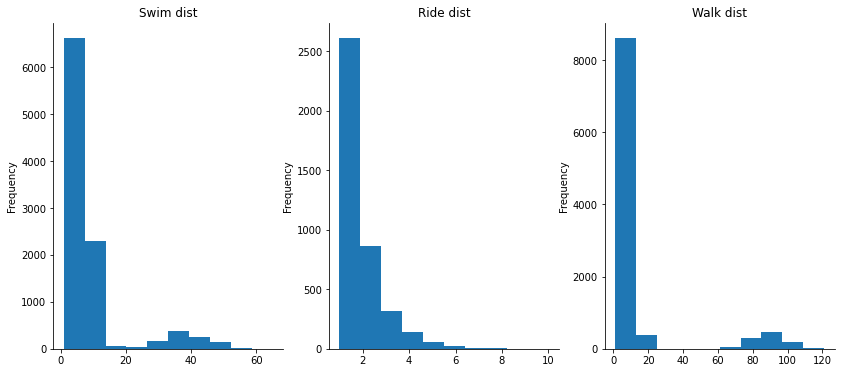

In [40]:
#We can see no specific pattern but there are still some values that show higher win place percentage.
# so checking the Skewness of the data

figure1, axplt = plt.subplots(1, 3, figsize=(14, 6))
data['swimDistance'].value_counts().sort_index()[1:20].plot.hist(ax=axplt[0])
data['rideDistance'].value_counts().sort_index()[1:20].plot.hist(ax=axplt[1])
data['walkDistance'].value_counts().sort_index()[1:20].plot.hist(ax=axplt[2])
axplt[0].set_title('Swim dist')
axplt[1].set_title('Ride dist')
axplt[2].set_title('Walk dist')
plt.subplots_adjust(hspace=.3)
sb.despine()

- these data are left skewed..

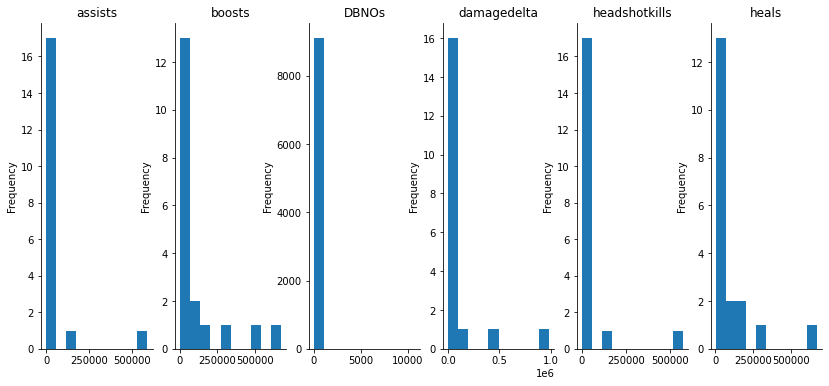

In [41]:
figure1, axplt = plt.subplots(1, 6, figsize=(14, 6))
data['assists'].value_counts().sort_index()[1:20].plot.hist(ax=axplt[0])
data['boosts'].value_counts().sort_index()[1:20].plot.hist(ax=axplt[1])
data['damageDealt'].value_counts().sort_index()[1:20].plot.hist(ax=axplt[2])
data['DBNOs'].value_counts().sort_index()[1:20].plot.hist(ax=axplt[3])
data['headshotKills'].value_counts().sort_index()[1:20].plot.hist(ax=axplt[4])
data['heals'].value_counts().sort_index()[1:20].plot.hist(ax=axplt[5])
axplt[0].set_title('assists')
axplt[1].set_title('boosts')
axplt[2].set_title('DBNOs')
axplt[3].set_title('damagedelta')
axplt[4].set_title('headshotkills')
axplt[5].set_title('heals')
plt.subplots_adjust(hspace=.3)
sb.despine()

- These data's are left skewed

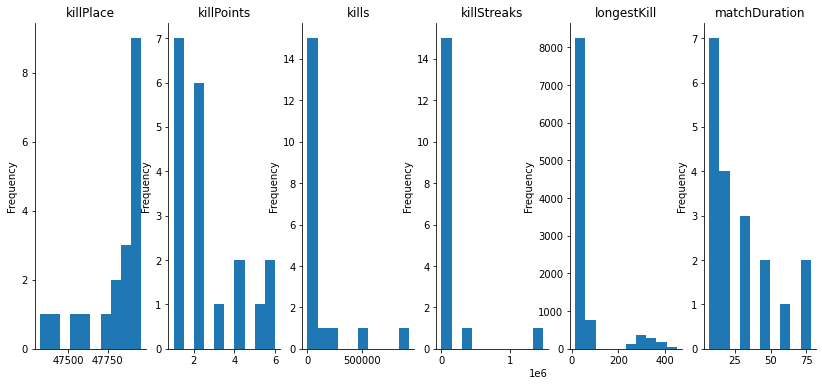

In [42]:
figure1, axplt = plt.subplots(1, 6, figsize=(14, 6))
data['killPlace'].value_counts().sort_index()[1:20].plot.hist(ax=axplt[0])
data['killPoints'].value_counts().sort_index()[1:20].plot.hist(ax=axplt[1])
data['kills'].value_counts().sort_index()[1:20].plot.hist(ax=axplt[2])
data['killStreaks'].value_counts().sort_index()[1:20].plot.hist(ax=axplt[3])
data['longestKill'].value_counts().sort_index()[1:20].plot.hist(ax=axplt[4])
data['matchDuration'].value_counts().sort_index()[1:20].plot.hist(ax=axplt[5])
axplt[0].set_title('killPlace')
axplt[1].set_title('killPoints')
axplt[2].set_title('kills')
axplt[3].set_title('killStreaks')
axplt[4].set_title('longestKill')
axplt[5].set_title('matchDuration')
plt.subplots_adjust(hspace=.3)
sb.despine()

- KillPlace is right skewed, remaining all above are left skewed

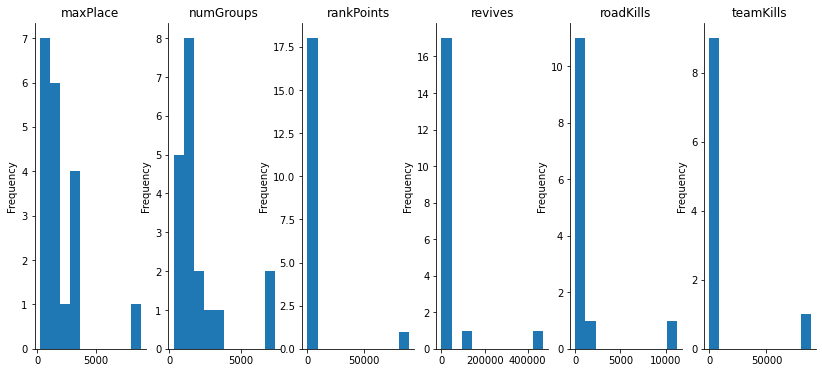

In [43]:
figure1, axplt = plt.subplots(1, 6, figsize=(14, 6))
data['maxPlace'].value_counts().sort_index()[1:20].plot.hist(ax=axplt[0])
data['numGroups'].value_counts().sort_index()[1:20].plot.hist(ax=axplt[1])
data['rankPoints'].value_counts().sort_index()[1:20].plot.hist(ax=axplt[2])
data['revives'].value_counts().sort_index()[1:20].plot.hist(ax=axplt[3])
data['roadKills'].value_counts().sort_index()[1:20].plot.hist(ax=axplt[4])
data['teamKills'].value_counts().sort_index()[1:20].plot.hist(ax=axplt[5])
axplt[0].set_title('maxPlace')
axplt[1].set_title('numGroups')
axplt[2].set_title('rankPoints')
axplt[3].set_title('revives')
axplt[4].set_title('roadKills')
axplt[5].set_title('teamKills')
plt.subplots_adjust(hspace=.3)
sb.despine()

- all data's are left skewed

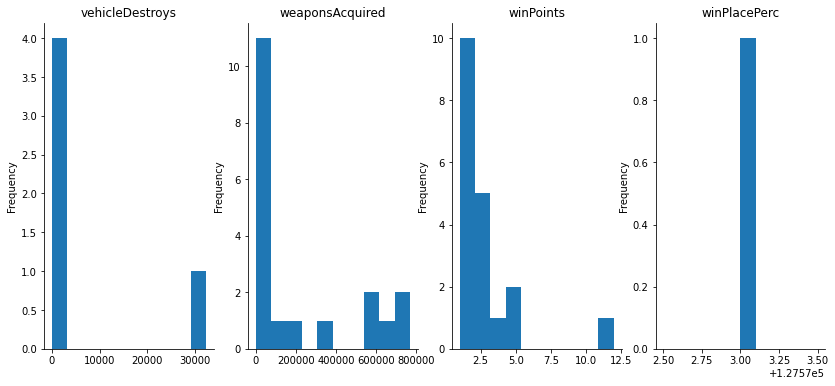

In [44]:
figure1, axplt = plt.subplots(1, 4, figsize=(14, 6))
data['vehicleDestroys'].value_counts().sort_index()[1:20].plot.hist(ax=axplt[0])
data['weaponsAcquired'].value_counts().sort_index()[1:20].plot.hist(ax=axplt[1])
data['winPoints'].value_counts().sort_index()[1:20].plot.hist(ax=axplt[2])
data['winPlacePerc'].value_counts().sort_index()[1:20].plot.hist(ax=axplt[3])
axplt[0].set_title('vehicleDestroys')
axplt[1].set_title('weaponsAcquired')
axplt[2].set_title('winPoints')
axplt[3].set_title('winPlacePerc')
plt.subplots_adjust(hspace=.3)
sb.despine()

- all are left skewed except killplace which is right skewed and out target winplace perc with no skewness

# some EDA and Visualisation

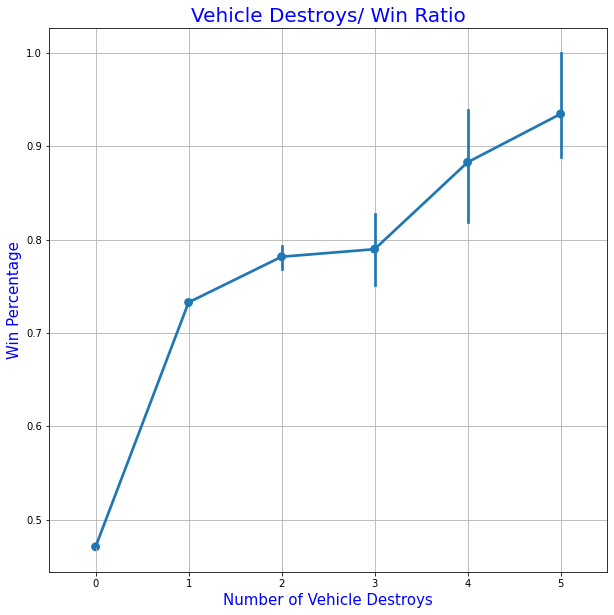

In [45]:
f,ax1 = plt.subplots(figsize =(10,10))
sb.pointplot(x='vehicleDestroys',y='winPlacePerc',data=data)
plt.xlabel('Number of Vehicle Destroys',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Vehicle Destroys/ Win Ratio',fontsize = 20,color='blue')
plt.grid()
plt.show()

In [47]:
#There are 3 game modes in the game. One can play solo, or with a friend (duo), or with 3 other friends (squad). 100 players join the same server, 
#so in the case of duos the max teams are 50 and in the case of squads the max teams are 25.
solos = data[data['numGroups']>50]
duos = data[(data['numGroups']>25) & (data['numGroups']<=50)]
squads = data[data['numGroups']<=25]

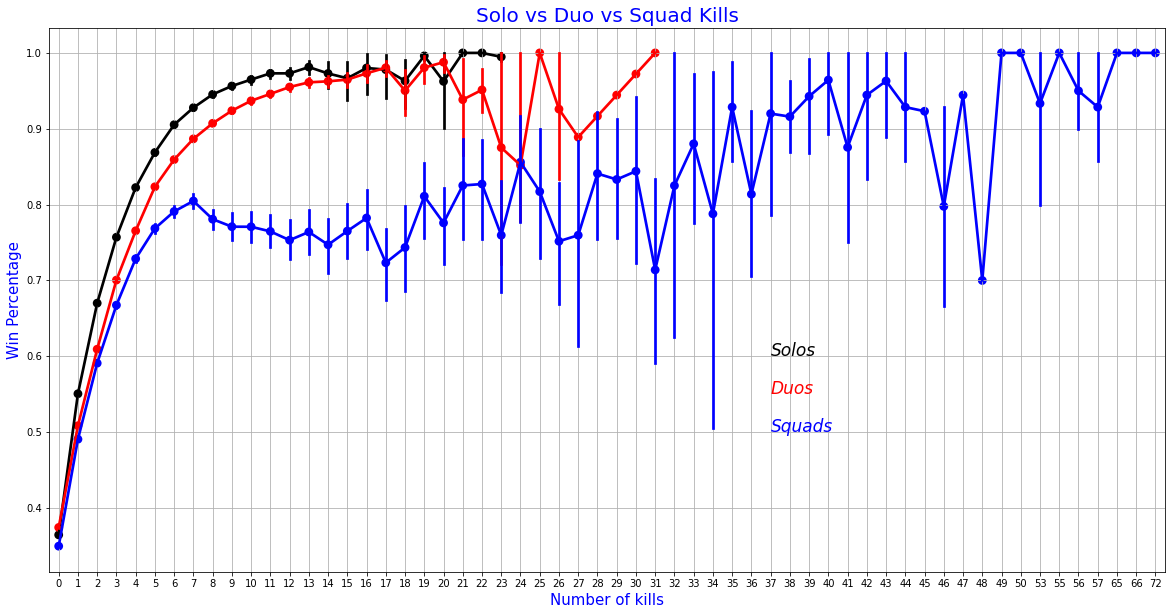

In [48]:
# Based on groups

f,ax1 = plt.subplots(figsize =(20,10))
sb.pointplot(x='kills',y='winPlacePerc',data=solos,color='black',alpha=0.8)
sb.pointplot(x='kills',y='winPlacePerc',data=duos,color='red',alpha=0.8)
sb.pointplot(x='kills',y='winPlacePerc',data=squads,color='blue',alpha=0.8)
plt.text(37,0.6,'Solos',color='black',fontsize = 17,style = 'italic')
plt.text(37,0.55,'Duos',color='red',fontsize = 17,style = 'italic')
plt.text(37,0.5,'Squads',color='blue',fontsize = 17,style = 'italic')
plt.xlabel('Number of kills',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Solo vs Duo vs Squad Kills',fontsize = 20,color='blue')
plt.grid()
plt.show()

- solo and duo is almost same but in squad kills is not much mandatory or play more role

In [49]:
# Based on Match type available

df = data[data['matchType']=='solo']
df1 = data[data['matchType']=='solo-fpp']
df2 = data[data['matchType']=='normal-solo-fpp']
df3 = data[data['matchType']=='normal-solo']
solo = pd.concat([df,df1,df2,df3],axis=0)
d1 = data[data['matchType']=='duo']
d2 = data[data['matchType']=='duo-fpp']
d3 = data[data['matchType']=='normal-duo']
d4 = data[data['matchType']=='normal-duo-fpp']
d5 = data[data['matchType']=='crashfpp']
d6 = data[data['matchType']=='crashtpp']
duo = pd.concat([d1,d2,d3,d4,d5,d6],axis=0)
s1 = data[data['matchType']=='squad']
s2 = data[data['matchType']=='squad-fpp']
s3 = data[data['matchType']=='normal-squad']
s4 = data[data['matchType']=='normal-squad-fpp']
s5 = data[data['matchType']=='flarefpp']
s6 = data[data['matchType']=='flaretpp']
sqd = pd.concat([s1,s2,s3,s4,s5,s6],axis=0)

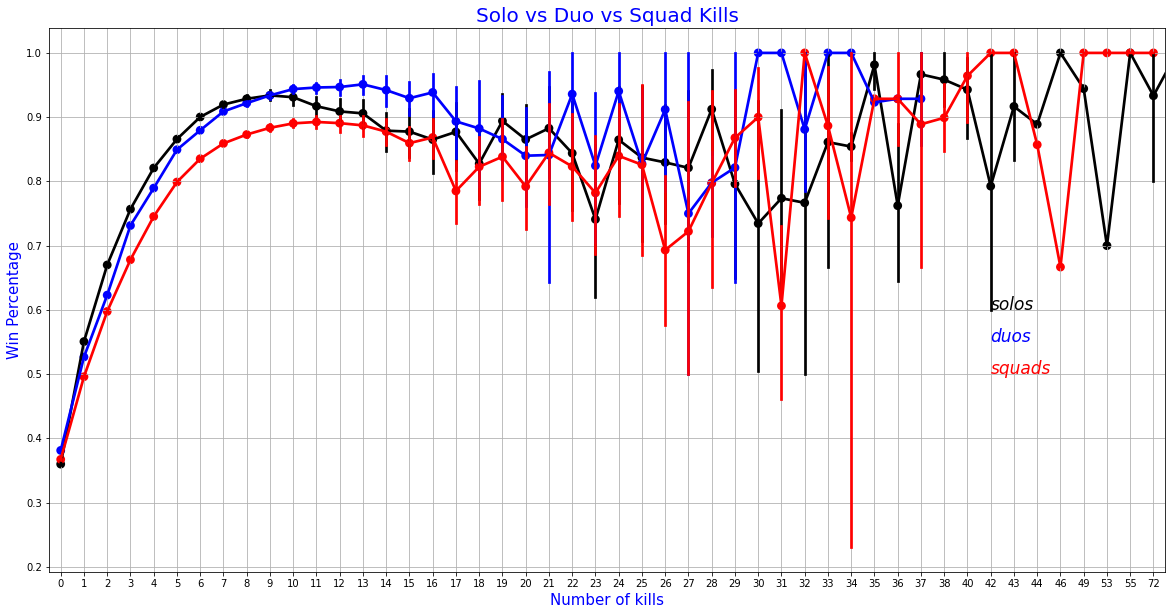

In [50]:
f,ax1 = plt.subplots(figsize =(20,10))
sb.pointplot(x='kills',y='winPlacePerc',data=solo,color='black',alpha=0.8)
sb.pointplot(x='kills',y='winPlacePerc',data=duo,color='blue',alpha=0.8)
sb.pointplot(x='kills',y='winPlacePerc',data=sqd,color='red',alpha=0.8)
plt.text(40,0.60,'solos',color='black',fontsize = 17,style = 'italic')
plt.text(40,0.55,'duos',color='blue',fontsize = 17,style = 'italic')
plt.text(40,0.5,'squads',color='red',fontsize = 17,style = 'italic')
plt.xlabel('Number of kills',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Solo vs Duo vs Squad Kills',fontsize = 20,color='blue')
plt.grid()
plt.show()

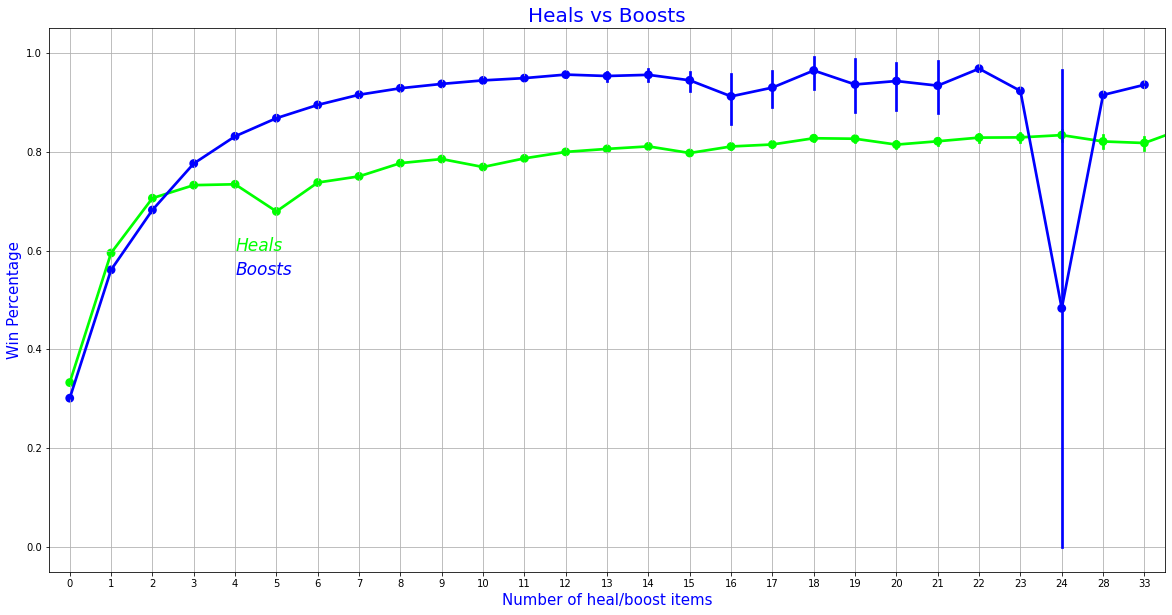

In [51]:
# Heals and Boosts

data[data['heals'] < data['heals'].quantile(0.99)]
data[data['boosts'] < data['boosts'].quantile(0.99)]

f,ax1 = plt.subplots(figsize =(20,10))
sb.pointplot(x='heals',y='winPlacePerc',data=data,color='lime')
sb.pointplot(x='boosts',y='winPlacePerc',data=data,color='blue')
plt.text(4,0.6,'Heals',color='lime',fontsize = 17,style = 'italic')
plt.text(4,0.55,'Boosts',color='blue',fontsize = 17,style = 'italic')
plt.xlabel('Number of heal/boost items',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Heals vs Boosts',fontsize = 20,color='blue')
plt.grid()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


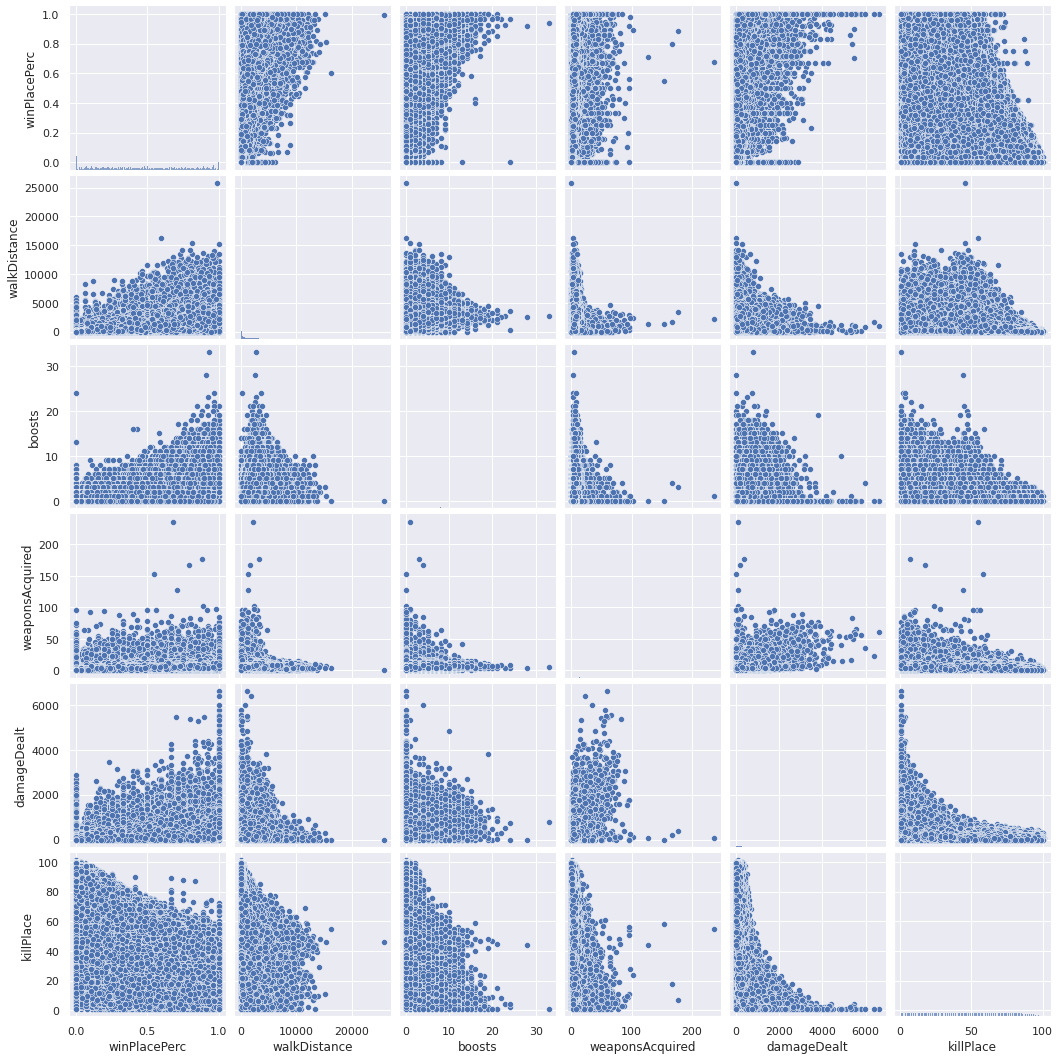

In [52]:
sb.set()
cols = ['winPlacePerc', 'walkDistance', 'boosts', 'weaponsAcquired', 'damageDealt', 'killPlace']
sb.pairplot(data[cols], size = 2.5)
plt.show()